# Segmenting customers of an e-commerce site
# Notebook 3 - Determine a period of maintenance

# Objective of the notebook

Analyze the segment stability over time in order to estimate a maintenance period.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Segmenting-customers-of-an-e-commerce-site" data-toc-modified-id="Segmenting-customers-of-an-e-commerce-site-1">Segmenting customers of an e-commerce site</a></span></li><li><span><a href="#Notebook-3---Determine-a-period-of-maintenance" data-toc-modified-id="Notebook-3---Determine-a-period-of-maintenance-2">Notebook 3 - Determine a period of maintenance</a></span></li><li><span><a href="#Objective-of-the-notebook" data-toc-modified-id="Objective-of-the-notebook-3">Objective of the notebook</a></span></li><li><span><a href="#I)-Import-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="I)-Import-of-the-dataset-into-a-pandas-dataframe-4">I) Import of the dataset into a pandas dataframe</a></span><ul class="toc-item"><li><span><a href="#1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables" data-toc-modified-id="1)-Import-all-librairies-and-tools-required-to-realize-the-project-and-set-the-first-global-variables-4.1">1) Import all librairies and tools required to realize the project and set the first global variables</a></span></li><li><span><a href="#2)-Import-the-datasets" data-toc-modified-id="2)-Import-the-datasets-4.2">2) Import the datasets</a></span><ul class="toc-item"><li><span><a href="#a)-Check-the-first-rows-of-the-dataset-to-determine-which-data-separator-is-used" data-toc-modified-id="a)-Check-the-first-rows-of-the-dataset-to-determine-which-data-separator-is-used-4.2.1">a) Check the first rows of the dataset to determine which data separator is used</a></span></li><li><span><a href="#b)-Importation-of-the-dataset-into-a-pandas-dataframe" data-toc-modified-id="b)-Importation-of-the-dataset-into-a-pandas-dataframe-4.2.2">b) Importation of the dataset into a pandas dataframe</a></span></li></ul></li></ul></li><li><span><a href="#II)-Simulation" data-toc-modified-id="II)-Simulation-5">II) Simulation</a></span><ul class="toc-item"><li><span><a href="#1)-Functions" data-toc-modified-id="1)-Functions-5.1">1) Functions</a></span></li><li><span><a href="#2)-Partitioning" data-toc-modified-id="2)-Partitioning-5.2">2) Partitioning</a></span><ul class="toc-item"><li><span><a href="#a)-Generate-the-first-partition" data-toc-modified-id="a)-Generate-the-first-partition-5.2.1">a) Generate the first partition</a></span></li><li><span><a href="#b)-ARI-score" data-toc-modified-id="b)-ARI-score-5.2.2">b) ARI score</a></span><ul class="toc-item"><li><span><a href="#i.-Calculate-the-score-for-each-partition's-generation" data-toc-modified-id="i.-Calculate-the-score-for-each-partition's-generation-5.2.2.1">i. Calculate the score for each partition's generation</a></span></li><li><span><a href="#ii.-Graphical-representation-of-the-ARI-score" data-toc-modified-id="ii.-Graphical-representation-of-the-ARI-score-5.2.2.2">ii. Graphical representation of the ARI score</a></span></li></ul></li></ul></li></ul></li></ul></div>

# I) Import of the dataset into a pandas dataframe

## 1) Import all librairies and tools required to realize the project and set the first global variables

In [1]:
### File management ###

import os
from pathlib import Path


### Data manipulations ###

import numpy as np
from numpy import set_printoptions # Saving full data when exporting to csv format.
import pandas as pd


### Maths ###

from math import floor, log10, inf, trunc


### Models & pipelines ###

from sklearn.pipeline import Pipeline

# Scalers.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Scorer.
from sklearn.metrics import adjusted_rand_score

# Clustering Librairies to import.
from sklearn.cluster import KMeans


### Date & time ###

# Time measurment and datetime management
#import datetime as dt
#from time import time


### Data visualizations ###

#from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go


### Warnings management ###

import warnings
warnings.filterwarnings('ignore')


### Figures default parameters ###

# Sets the default matplotlib parameters for the whole notebook.
plt.rcParams["figure.figsize"] = [8,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

# Default parameters of seaborn's figures.
#sns.set_style('whitegrid')
default_palette = 'deep' # Other keywords: 'deep', 'muted', 'bright', 'tab10', 'hsl', 'husl', 'paired'.
sns.set_style('white') # NB: Needs to be above sns.set_theme to properly attend custom_params.
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='ticks', palette=default_palette, rc=custom_params)

# Display color palettes.
# NB1: Check this link for more color palette options: https://seaborn.pydata.org/tutorial/color_palettes.html
# NB2: Check this link for more figure's dot symbols options: http://www.python-simple.com/python-matplotlib/scatterplot.php
print('Default color palette of the sns figures in the notebook:')
display(sns.color_palette(default_palette, 10))


### Global file paths ###

# Get the project file path.
tup_NB_PATH = Path(os.getcwd()).parts # Get the absolute current folder path of the notebook and split it in a tuple.
PROJ_PATH = os.path.join(*tup_NB_PATH[:tup_NB_PATH.index('P5')+1]) # Get the absolute project folder path by truncing the notebook path at the project folder.

# Main file paths.
DATASET_PATH = os.path.join(PROJ_PATH, "GitRepo", "Exports", "olist-customers-data-for-clustering.csv")

# Check paths.
print('Project\'s folder path:          ' + PROJ_PATH +
      '\nDataset\'s path:                 ' + DATASET_PATH +
      '\nCurrent notebook\'s folder path: ' + os.getcwd()
     )

Default color palette of the sns figures in the notebook:


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Project's folder path:          D:\_MP-P2P\MP_P2P-Pro\Archives\Etudes\2023-OC-DS\P5
Dataset's path:                 D:\_MP-P2P\MP_P2P-Pro\Archives\Etudes\2023-OC-DS\P5\GitRepo\Exports\olist-customers-data-for-clustering.csv
Current notebook's folder path: D:\_MP-P2P\MP_P2P-Pro\Archives\Etudes\2023-OC-DS\P5\GitRepo


## 2) Import the datasets

### a) Check the first rows of the dataset to determine which data separator is used

In [2]:
def read_csv_line (line_nb, csv_path=''):
    
    """
    Description
    -----------
    Allows to check some lines in the csv file to spot the separator used between data.
    
    Parameters
    ----------
    line_nb: int
        Line to check in the csv file.
    csv_path: str
        Csv file's path.
    
    """
    
    opened_csv = open(csv_path)
    
    line = ""
    for line_cnt in range(line_nb+1):
        line = opened_csv.readline()
        
    print(">>>>>> Line %d" % (line_cnt))
    print(line)

In [3]:
def dataset_path (dataset_file):

    """
    Description
    -----------
    Generate the dataset.
    
    Parameters
    ----------
    dataset_file: csv file
        Dataset file to import.
        
    Return: str
    ------
    Return the file's path. 
   
    """
    
    return os.path.join("Dataset", dataset_file)

The datasets to import are selected if they contain a customer ID or an order ID feature.

### b) Importation of the dataset into a pandas dataframe

In [4]:
%%time

# Make dataframes to store the raw data.
data_raw = pd.read_csv(DATASET_PATH, sep = ',')
data_raw = data_raw.drop('Unnamed: 0', axis=1)
data_raw['order_purchase_timestamp'] = data_raw['order_purchase_timestamp'].astype('datetime64[ns]')

# Show the dataframes.
print("\n\n\nCustomers data:")
display(data_raw.head(3))
display(data_raw.info())




Customers data:


,customer_unique_id,seasonal_sales,order_purchase_timestamp,customer_zip_code_prefix,customer_city,zipcode_lat,zipcode_lng,city_lat,city_lng,state_lat,...,item_price_mean,nb_item_per_order_mean,uptodate_review_score_mean,delivery_time_in_days_mean,time_period_since_last_order,mean_time_period_between_orders,customer_state,hv_distance_zipcode_olist,hv_distance_city_olist,hv_distance_state_olist
0,7c396fd4830fd04220f754e42b4e5bff,10,2017-10-02 10:56:33,3149,sao paulo,-23.576983,-46.587161,-23.570860,-46.633242,-23.155308,...,32.69,1.0,4.5,4.5,331,27.0,São Paulo,335.545186,332.138702,328.466767
1,af07308b275d755c9edb36a90c618231,7,2018-07-24 20:41:37,47813,barreiras,-12.177924,-44.660711,-12.148291,-44.967260,-13.049361,...,118.70,1.0,4.0,13.0,35,695.0,Bahia,1538.402349,1531.676660,1701.813668
2,3a653a41f6f9fc3d2a113cf8398680e8,8,2018-08-08 08:38:49,75265,vianopolis,-16.745150,-48.514783,-16.745552,-48.514168,-16.577645,...,159.90,1.0,5.0,9.0,21,695.0,Goiás,955.201529,955.162403,970.315687


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91787 entries, 0 to 91786
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_unique_id               91787 non-null  object        
 1   seasonal_sales                   91787 non-null  int64         
 2   order_purchase_timestamp         91787 non-null  datetime64[ns]
 3   customer_zip_code_prefix         91787 non-null  int64         
 4   customer_city                    91787 non-null  object        
 5   zipcode_lat                      91787 non-null  float64       
 6   zipcode_lng                      91787 non-null  float64       
 7   city_lat                         91787 non-null  float64       
 8   city_lng                         91787 non-null  float64       
 9   state_lat                        91787 non-null  float64       
 10  state_lng                        91787 non-null  float64  

None

Wall time: 443 ms


# II) Simulation

## 1) Functions

In [6]:
def display_EZ (x, max_rows = 100, max_cols = 100, max_colwidth = 100):
    
    """
    Description
    -----------
    Allows to display pandas dataframes with the number of rows and columns whished in an easy manner.
    
    Parameters
    ----------
    df: pandas.DataFrame()
        Dataframe to display.
    max_rows: int
        Maximum number of rows to display.
    max_cols: int
        Maximum number of columns to display.
    max_colwidth: int
        Maximum width of each column.
        
    """
    
    with pd.option_context('display.max_rows', max_rows, 'display.max_columns', max_cols, 'display.max_colwidth', max_colwidth):
        display(x)

In [7]:
def n_decimal_zeros (decimal, n_decimal_nb = 0):
        
    """
    Description
    -----------
    Count the number of consecutive zeros after the decimal's separator.
    
    Parameters
    ----------
    decimal: float
        Decimal part of the number in which perform the counting.
    n_decimal_nb: int
        Number of decimal to keep after the last consecutive zero.
 
    Return: int
    ------
    Returns the number of consecutive zeros counted + the specified number of decimals to keep in addition.
    
    """
        
    return 0 if decimal == 0 else -floor(log10(abs(decimal))) - 1 + n_decimal_nb 

In [8]:
def select_time_period (df, p = 0, period = 12, time_period_col = 'order_purchase_timestamp'):
    
    """
    Description
    -----------
    Reduce the dataframe in the desired time period partition.
    
    Parameters
    ----------
    df: pandas.Dataframe()
        Dataframe to process.
    period: int
        Total range period of the partition.
    p: int
        Offset to shift the starting and ending date of the partition.
    time_period_col: str
        Column's name in which to get the datetimes.

    Return: pandas.DataFrame()
    ------
    Returns the selected partition.
        
    """
    
    # Set the partition datetime's range.
    df_first_date = df[time_period_col].min()
    partition_first_date = df_first_date + pd.DateOffset(months = p)
    partition_last_date = partition_first_date + pd.DateOffset(months = period)
    
    # Get the partition.
    df = df[(df[time_period_col] >= partition_first_date) &
            (df[time_period_col] < partition_last_date)]
    
    # Display the partition datetime's range.
    print("The first date the df is", df_first_date)
    print("The first date of this partition is", df[time_period_col].min())
    print("The last date of this partition is", df[time_period_col].max())
    print("\n")
    
    # Select only numerical data.
    numerical_features = list(df.select_dtypes(include=['int64','float64', 'uint8']).columns)
    df = df[numerical_features]
    
    return df

In [9]:
def select_time_period_v2 (df, p = 0, period = 12, time_period_col = 'order_purchase_timestamp'):
    
    """
    Description
    -----------
    Reduce the dataframe in the desired time period partition.
    
    Parameters
    ----------
    df: pandas.DataFrame()
        Dataframe to process.
    period: int
        Total range period of the partition.
    p: int
        Offset to shift the ending date of the partition.
    time_period_col: str
        Column's name in which to get the datetimes.

    Return: pandas.Dataframe()
    ------
    Returns the selected partition.
        
    """
    
    # Set the partition datetime's range.
    df_first_date = df[time_period_col].min()
    partition_last_date = df_first_date + pd.DateOffset(months = period + p)
    
    # Get the partition.
    df = df[(df[time_period_col] >= df_first_date) &
            (df[time_period_col] < partition_last_date)]
    
    # Display the partition datetime's range.
    print("The first date of this partition is", df[time_period_col].min())
    print("The last date of this partition is", df[time_period_col].max())
    print("\n")
    
    # Select only numerical data.
    numerical_features = list(df.select_dtypes(include=['int64','float64', 'uint8']).columns)
    df = df[numerical_features]
    
    return df

## 2) Partitioning

### a) Generate the first partition

The first partition will be used as reference to watch at the number of dots which will move from a cluster to another on the defined time period.

In [10]:
selected_feature = [
                # Non-numerical values:
                    'customer_unique_id',
                    'order_purchase_timestamp',
    
                # RFMS:
                    'time_period_since_last_order', # Recency
                    'total_nb_of_orders', # Frequency
                    'total_money_spent', # Monetary
                    'uptodate_review_score_mean', # Satisfaction
                
                # Relevant additional features:
                    'seasonal_sales',
                    'delivery_time_in_days_mean',
                    'total_freight_value',
                    'nb_payment_sequential_mean',
                    'all_payment_installments_mean',
                   ]

In [11]:
# Get the df to process.
df = data_raw[selected_feature]

# Set the key variables.
time_period_col = 'order_purchase_timestamp'
K = 6 # Number of clusters.

In [12]:
# Get the full dataframe time period.
time_range = round((df[time_period_col].max() - df[time_period_col].min()).days / ((31*6 + 30*5 + 28)/12), 2)
print("The total time period's range of the full dataset is", time_range, "months.")

The total time period's range of the full dataset is 22.88 months.


In [13]:
%%time

# Initialize the settings.
partitions_size = 12 # 12 means one year per partition.
p = 0

# Generate the first partition.
df_ini = select_time_period(df, p, partitions_size)
display(df_ini.head(3))

# Make the segmentation on this partition. 
kmeans_init = Pipeline([("preprocessor", MinMaxScaler()),
                        ("kmeans", KMeans(K, random_state=20))])
kmeans_init.fit(df_ini)

# Get the clusters' labels.
init_labels = kmeans_init.named_steps['kmeans'].labels_
print("\nClusters labels of the initial partition:", set(init_labels))

The first date the df is 2016-10-03 16:56:50
The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16




,time_period_since_last_order,total_nb_of_orders,total_money_spent,uptodate_review_score_mean,seasonal_sales,delivery_time_in_days_mean,total_freight_value,nb_payment_sequential_mean,all_payment_installments_mean
0,331,2,82.82,4.5,10,4.5,17.44,2.0,2.0
5,415,1,175.26,4.0,7,16.0,27.36,1.0,6.0
6,470,1,75.16,5.0,5,9.0,15.17,1.0,3.0



Clusters labels of the initial partition: {0, 1, 2, 3, 4, 5}
Wall time: 1.44 s


### b) ARI score

The ARI (Adjusted Rand Index) score will be used to measure the distributions similarity of customers in the different clusters between the partitions.

**Reminder of what is the ARI score:**
*The Rand index is the proportion of pairs of points (x1,x2) which are grouped in the same way in the two partitions: either because, in both cases, x1 and x2 belong to the same cluster, or because, in both cases, x1 and x2 belong to different clusters.<br>
The Rand index can be inflated artificially by predicting many clusters: the pairs of points belonging to different clusters will be numerous, and there will be a high chance that two differently labeled points will be in two different clusters.<br>
=> The Adjusted Rand Index (ARI) fixes this effect by normalizing the Rand Index (RI):*

  *ARI = (RI − E(RI)) / (max(RI) − E(RI))*

*E(RI) is the expectation of the value of the Rand index, in other words the index obtained by partitioning data randomly. This adjusted index is close to 0 for a random clustering and equal to 1 when the clustering corresponds exactly to the initial partition.*

#### i. Calculate the score for each partition's generation

In [17]:
%%time

# Initialize the dataframe.
df_ari = pd.DataFrame(columns=['period', 'ARI'])

# Set the number of runs to mean.
for i in range(50):
    
    # Show the iteration.
    print("Iteration:", i, "\n")
    
    # Reset the period for the run.
    p=0
    
    # Initialize the settings.
    ari_score = []

    # Partition the dataset.
    for p in np.arange(p, time_range - partitions_size, 2):
              
        # Create dataset for period.
        data_partition = select_time_period_v2(df, p)

        # Clustering of the partition.
        clustering_pipeline_p = Pipeline([("preprocessor", MinMaxScaler()),
                                          ("kmeans", KMeans(K, random_state=20))])
        clustering_pipeline_p.fit(data_partition)
    
        # Filter on initial customers (Customers of in the initial partition).
        data_partition = data_partition[data_partition.index.isin(df_ini.index)]
    
        # Get the clusters' labels.
        #p_labels = clustering_pipeline_p.named_steps['kmeans'].labels_
        p_labels = clustering_pipeline_p.predict(data_partition)

        # Calculate the ARI score.
        ari_p = adjusted_rand_score(init_labels, p_labels)
        ari_score.append([p, ari_p])
        
    # Store the ARI score previously calculated in a pandas's dataframe.
    df_ari_inter = pd.DataFrame(ari_score, columns=['period', 'ARI'])
    df_ari = pd.concat([df_ari, df_ari_inter])

Iteration: 0 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 1 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last d

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 12 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 13 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 24 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 25 

The first date of this partition is 2016-10-03 16:56:50
The last

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 36 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this pa

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-06-03 16:54:32


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-08-03 16:56:34


Iteration: 48 

The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-10-03 16:44:16


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2017-12-03 16:52:02


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-02-03 16:53:40


The first date of this partition is 2016-10-03 16:56:50
The last date of this partition is 2018-04-03 16:47:37


The first date of this partition is 2016-10-03 16:56:50
The last date of this pa

In [18]:
# Show the result.
df_ari_mean = df_ari.groupby('period', as_index=False).mean()
display(df_ari_mean)

,period,ARI
0,0.0,0.884646
1,2.0,0.388194
2,4.0,0.388354
3,6.0,0.364811
4,8.0,0.313079
5,10.0,0.283205


#### ii. Graphical representation of the ARI score

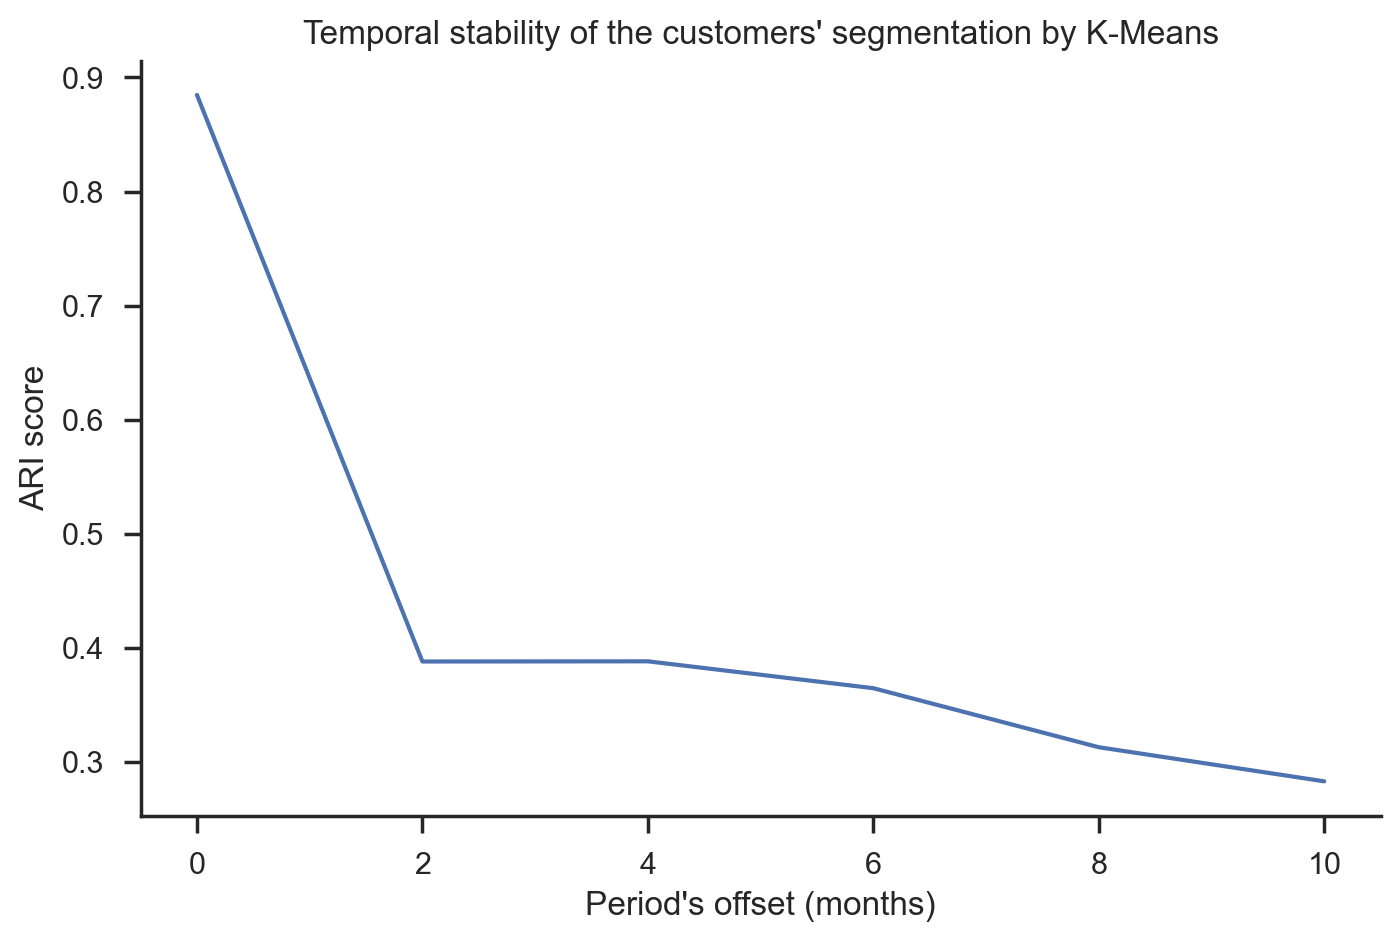

Wall time: 162 ms


In [21]:
%%time

# Set the figure's environment.
fig = plt.figure(figsize=(8,5))

# Generate the figure.
sns.lineplot(data=df_ari_mean, x='period', y='ARI')

# Set the figure's axes.
plt.xlabel("Period's offset (months)")
plt.ylabel('ARI score')
plt.title("Temporal stability of the customers' segmentation by K-Means")

# Display the figure.
plt.show()

As it can be observed the ARI score is quickly dropping within the first months.<br>
=> A maintenance would be required within 2 months. A re-test of the temporal stability should be performed at the same time in order to refine the maintenance time period. Therefore, it will be necessary to redefine the customer segments at each maintenance.